# P03 Ejemplos Proceso

Pensamiento Computacional, Escuela Diseño UC

Profesores Ricardo Vega, Francisco Rebolledo

Actualizado junio 2025.

Para el proyecto P03 se consideran algunas de estas etapas, de las cuales se brindan ejemplos a continuación.

**A- RECOLECCIÓN Y ESTRUCTURACIÓN:**  
Considera scrapping desde sitios de noticias, o a veces recoplección desde bases de datos.  

**B- INSPECCIÓN Y LIMPIEZA:**  
Luego de ver las principales características de los datos de texto, se deja solo la información necesaria. De esta manera se dejan los datos en el formato adecuado para trabajar.

**C- ANÁLISIS Y VISUALIZACIÓN:**  
Una vez en formato adecuado, se analiza el texto usando de estrategias de visualización. Algunas técnicas posibles de usar son:

**- Dispersión léxica:** en qué parte del texto se encuentan ciertas palabras.
**- Frecuencia de Palabras:** Cuales son las palabras más repetidas.
**- Relaciones: Cuáles son las personas o agentes involucrados y cómo se relacinan o a que institucines pertenecen.
**- Nube de Palabras:** similar a frecuenia de palabras pero en formato visual (ver ejemplo wikipedia).

En esta etapa también se puede convertit el texto en una "bolsa de Palabras (BOW, Bag Of Words), para ordenarlas, dejarlas como palabras independientes y poder contarlas, eliminando las palabras con mejos significado semántico

**D- Reporte:**  
Diseñar un reporte en formato infografía con los resultados, usando los gráficos desarrrollados, imágenes y otros recursos.

**E- AHORA C WIKIPEDIA**  
Se puede capturar algunos artículos de Wikipedia, y crear una nube de palabras.


In [ ]:
## - - - - - - - - - - - -
## IMPORTAR LIBRERÍAS:
## - - - - - - - - - - - -

# para trabajar en procesamiento de datos
import pandas as pd

# importar libreria visualizacion.
import matplotlib.pyplot as plt

# para conectarse a las url de las noticias en la web
import requests

# para hacer scraping desde sitios web permote seleccinar los tags y capturar los elementos que contiene
from bs4 import BeautifulSoup

#import unicodedata


In [ ]:
## - - - - - - - - - - - -
## IMPORTANTE COLAB
## - - - - - - - - - - - -

# Recordar que en colab para traer datos y guardar archivos el proceso requiere otros elementos.
# Descomentar cuando esten en colab
# montar carpeta drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## - - - - - - - - - - - -
## LEER ARCHIVO STOP WORDS DESDE SU COLAB
## - - - - - - - - - - - -

# Importarlo ahora, más adelante se usara.
# leer archivo y guardar en df
ruta_al_archivo_aca = "/content/drive/MyDrive/_2025A_UC/UC_DIS_PCOMP_2025A/Ejercicios_python/P03_ejemplo/stop_words_new.csv"
df_stopw = pd.read_csv( ruta_al_archivo_aca )

# botar la columna Unnamed: 0 del df
df_stopw.drop( "Unnamed: 0", axis=1, inplace=True )
df_stopw # mostrar


,palabras
0,0
1,1
2,2
3,3
4,4
...,...
762,permite
763,años
764,propuesta
765,caracter


## **RECOLECCIÓN Y ESTRUCTURACIÓN:**  

A- Scrapping:   


### A- Scrapping:

Debe buscar de la noticia web, los tags correspondientes para capturar la información que nos interesa de manera dinámica. Esto se hace usando el inspector de Firefox o de Chrome.  

Exploraremos esta noticia:
https://www.elmostrador.cl/noticias/opinion/columnas/2024/11/17/digamoslo-con-todas-sus-letras-corrupcion/


In [ ]:
## Primero preguntar por respuesta desde el servidor que aloja la página.
req1 = requests.get('https://www.elmostrador.cl/noticias/opinion/columnas/2024/11/17/digamoslo-con-todas-sus-letras-corrupcion/')
larespuesta = req1.status_code

## mostrar respuesta, ojo se puede demorar un poco
## respuesta 200, indica que la solicitud fue éxitosa.
larespuesta


200

In [ ]:
## Ver HTML del request realizado antes
soup1 = BeautifulSoup(req1.content.decode("utf-8"),  "html.parser")

# mostrar el html
soup1



<!DOCTYPE html>

<html class="u-disable-effects scheme-desktop" lang="es">
<head>
<meta charset="utf-8"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="author"/>
<link href="/favicon.png" rel="shortcut icon" type="image/x-icon"/>
<link href="/_templates/desktop/includes/css/main.min.css?v=1.0.0.61" rel="stylesheet"/>
<meta content="" name="theme-color"/>
<!-- VARIABLES PARA METAS -->
<!-- /VARIABLES PARA METAS -->
<title>Digámoslo con todas sus letras: corrupción</title>
<meta content="corrupción,transparencia internacional" name="keywords"/>
<meta content="Transparencia Internacional establece que la corrupción es cualquier abuso de poder que le hemos confiado a alguien para la obtención de un beneficio. Entendiendo, justamente, que ese beneficio no necesariamente es material ni para quien perpetra el acto." name="description"/>
<meta content="website" property="og:type">
<meta conte

## - - - - - - - - - - - -
## IMPORTANTE

Este ejemplo extrate textos de una noticia específica.
Recuerde que para extraer noticias o textos de otras web,
debe revisar en que parte de las web está dicha noticia
y reconocer las etiquetas HTLM de donde obtenerlas.
Hay webs que no permiten o que tienen bloqueadores de scrapping.
Si tiene problemas, y no lo puede rescatar los contenidos con scrapping,
puede copiar y pegar el texto, no los afectará en la nota, pero debe mencionarlo.

## - - - - - - - - - - - -


In [ ]:
## - - - - - - - - - - - -
## OBTENER TITULO
## - - - - - - - - - - - -

# Seleccionaremos texto de la etiqueta de la noticia
# En este caso el titulo que etá en H1.
art_tit = soup1.find("h1").text.strip()

# mostrar
print( art_tit )


Digámoslo con todas sus letras: corrupción


In [ ]:
## - - - - - - - - - - - -
## OBTENER BAJADA DE LA NOTICIA
## - - - - - - - - - - - -

# Captura el texto de la, strip le corta espacios antes y despues.
# Este ejemplo tiene la clase también.
art_bajada = soup1.find("p", class_='d-the-single__excerpt | u-fw-600').text.strip()

#art_bajada = soup1.find("p", class_='d-the-single__excerpt | u-fw-600').text # probar sin strip

# Mostrar la bajada
print( art_bajada  )

# El resultado es un string, una cadena larga de caracteres.
print( type(art_bajada) )


Transparencia Internacional establece que la corrupción es cualquier abuso de poder que le hemos confiado a alguien para la obtención de un beneficio. Entendiendo, justamente, que ese beneficio no necesariamente es material ni para quien perpetra el acto.
<class 'str'>


In [ ]:
## - - - - - - - - - - - -
## SEPARAR PALABRAS BAJADA
## - - - - - - - - - - - -

# lower poner palabras en bajas
art_bajada_low   = art_bajada.strip().lower()

# Se separan todas las palabras y guardar en una lista
art_bajada_split = art_bajada_low.split() # Split corta
art_bajada_split


['transparencia',
 'internacional',
 'establece',
 'que',
 'la',
 'corrupción',
 'es',
 'cualquier',
 'abuso',
 'de',
 'poder',
 'que',
 'le',
 'hemos',
 'confiado',
 'a',
 'alguien',
 'para',
 'la',
 'obtención',
 'de',
 'un',
 'beneficio.',
 'entendiendo,',
 'justamente,',
 'que',
 'ese',
 'beneficio',
 'no',
 'necesariamente',
 'es',
 'material',
 'ni',
 'para',
 'quien',
 'perpetra',
 'el',
 'acto.']

### Ahora mas o menos lo mismo con el contenido del texto

In [ ]:
## - - - - - - - - - - - -
## OBTENER CONTENIDO
## - - - - - - - - - - - -

## find_all selecciona todos los elementos de un tipo, en este caso article
art_contenido = soup1.find_all("div", class_="d-the-single-wrapper__text" )
#art_contenido = soup1.find_all("div" )

# Mostrar contenido
print( len( art_contenido ) )
print( art_contenido[0].text.strip()   )


1
La idea de corrupción se ha instalado en el discurso público. Es común escuchar a diario en noticieros, redes sociales y conversaciones del día a día, sobre algún nuevo caso de corrupción o, incluso, el “se están robando todo”, y es cierto. Las personas se quedan con la sensación de que quienes están en espacios de decisión, sean públicos o privados, utilizan esa posición para beneficiarse. Pero ¿qué es realmente la corrupción?
Desde una perspectiva jurídica, puede ser comprendida como un delito; desde una mirada económica, como un atentado contra la libre competencia; o desde una mirada más social, la ruptura de los acuerdos de convivencia. Sin embargo, cada una de esas opciones sólo aborda parcialmente el problema, y justamente hacen que sea complejo abordar el fenómeno en su totalidad. Incluso, las diferencias que se observan desde cada punto de vista generan distorsiones en el debate que dan pie a interpretaciones antojadizas y caprichosas, que poco y nada contribuyen en generar 

In [ ]:
## - - - - - - - - - - - -
## SEPARAR PALABRAS BAJADA
## - - - - - - - - - - - -

# Poner palabras en bajas
art_contenido_low = art_contenido[0].text.lower()
art_contenido_low = art_contenido_low.strip()
#art_contenido_low

# Se pueden separar todas las letras
art_contenido_split = art_contenido_low.split()
#print( art_contenido_split )

# mostrar cuantas palabras obteniendo el len de la lista
art_contenido_split_cuantas = len( art_contenido_split )
print( "Cuantas palabas:", art_contenido_split_cuantas )


Cuantas palabas: 465


## **B- INSPECCIÓN Y LIMPIEZA:**  
B1- Inspeccion de características de los datos con (shape, info, describe)    
B2- Sacar las stopwords, se puede hacer a mano pero les dejo un archivo de stopword que pueden usar.

Una parte del proceso consiste en transformar el texto en una "bolsa de Palabras" (BOW, Bag Of Words), o sea las palabras independientes. Esto permite contarlas, ordenarlas, y visualizarlas. Esto se hace cuando se obtienen las palabras y se transforma en lista, allí todas las palabras quedan separadas.


### B1- Inspección de características de los datos de texto.


In [ ]:
## - - - - - - - - - - - -
## CONTAR PALABRAS BAJADA
## - - - - - - - - - - - -

art_bajada_split
print( "Cuantas palabras bajada:", len( art_bajada_split ) )


Cuantas palabras bajada: 38


In [ ]:
## - - - - - - - - - - - -
## CONTAR PALABRAS CONTENIDO
## - - - - - - - - - - - -

art_contenido_split
print( "Cuantas palabras contenido:", len( art_contenido_split ) )


Cuantas palabras contenido: 465


### B2- Sacar las stopwords

Las stop words son palabras (como "la", "de", "por", "de", "es", "1", "2", etc) que no definen, o no representan el contenido semántico de un texto. Se debe tener una lista de estas palabras para que el programa las encuentre, (obviamente son diferentes en inglés del en español). Esta lista se puede hacer a mano, pero les dejo un archivo de stopword que pueden usar (stop_words_new.csv).


In [ ]:
## - - - - - - - - - - - -
## Mostrar solo las stopwords
## - - - - - - - - - - - -

# usaremos el archivo subido al inicio
# convertirlo a lista con la funcióm tolist()
las_stopw = df_stopw["palabras"].tolist()

# Mostrar tipo de las stopwords
#type( las_stopw )

# Mostrar lista stopwords
las_stopw


['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '_',
 'a',
 'actualmente',
 'acuerdo',
 'adelante',
 'ademas',
 'además',
 'adrede',
 'afirmó',
 'agregó',
 'ahi',
 'ahora',
 'ahí',
 'al',
 'algo',
 'alguna',
 'algunas',
 'alguno',
 'algunos',
 'algún',
 'alli',
 'allí',
 'alrededor',
 'ambos',
 'ampleamos',
 'antano',
 'antaño',
 'ante',
 'anterior',
 'antes',
 'apenas',
 'aproximadamente',
 'aquel',
 'aquella',
 'aquellas',
 'aquello',
 'aquellos',
 'aqui',
 'aquél',
 'aquélla',
 'aquéllas',
 'aquéllos',
 'aquí',
 'arriba',
 'arribaabajo',
 'aseguró',
 'asi',
 'así',
 'atras',
 'aun',
 'aunque',
 'ayer',
 'añadió',
 'aún',
 'b',
 'bajo',
 'bastante',
 'bien',
 'breve',
 'buen',
 'buena',
 'buenas',
 'bueno',
 'buenos',
 'c',
 'cada',
 'casi',
 'cerca',
 'cierta',
 'ciertas',
 'cierto',
 'ciertos',
 'cinco',
 'claro',
 'comentó',
 'como',
 'con',
 'conmigo',
 'conocer',
 'conseguimos',
 'conseguir',
 'considera',
 'consideró',
 'consigo',
 'consigue',
 'consiguen',
 'consi

## **C- ANÁLISIS Y VISUALIZACIÓN:**  

En esta etapa se necesitan las palabras independientes (como bolsa de palabras, o BoW) para poder contarlas, eliminando las palabras con menor carga semántica. Algo que ya hicimos en los pasos anteriores. Para visualizar tenemos muchas posibilidades, veremos algunas:

- Dispersión léxica: en que parte del texto se encuentan ciertas palabras.
- Frecuencia de Palabras: Cuales sonas  palabras más repetidas.
- Relaciones: Cuales son las personas o agentes involucrados y como se relacinan o a que institucines pertenecen.




In [ ]:
## - - - - - - - - - - - -
## VOLVER A VER VARIABLES DE MAS ARRIBA QUE SON BoW
## - - - - - - - - - - - -

# descomentar de una para ver
art_bajada_split
#art_contenido_split


['transparencia',
 'internacional',
 'establece',
 'que',
 'la',
 'corrupción',
 'es',
 'cualquier',
 'abuso',
 'de',
 'poder',
 'que',
 'le',
 'hemos',
 'confiado',
 'a',
 'alguien',
 'para',
 'la',
 'obtención',
 'de',
 'un',
 'beneficio.',
 'entendiendo,',
 'justamente,',
 'que',
 'ese',
 'beneficio',
 'no',
 'necesariamente',
 'es',
 'material',
 'ni',
 'para',
 'quien',
 'perpetra',
 'el',
 'acto.']

### C1- Frecuencia
Para esto importaremos algunas librerías.


In [ ]:
# Recuerden que si esta libreria no está en Colab,
# pueden "cargarlas" a Colab con !pip y esperar a que se instalen.
# Como en este ejemplo:

#!pip install nltk

In [ ]:
## - - - - - - - - - - - -
# IMPORTAR LIBRERIAS DE ANALISIS DE TEXTO
## - - - - - - - - - - - -
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.text import Text


In [ ]:
## - - - - - - - - - - - -
## TOKENIZAR TEXTO
## - - - - - - - - - - - -

# Toneknizar es como crear una bolsa de de palabras
# pero en este caso, una BoW apropiada para el análisis con NLTK

# Para obtener la frecuencia de palabras contamos los tokens.
art_bajada_tokens_fq    = FreqDist( token for token in art_bajada_split )
art_contenido_tokens_fq = FreqDist( token for token in art_contenido_split )


<Axes: xlabel='Samples', ylabel='Counts'>

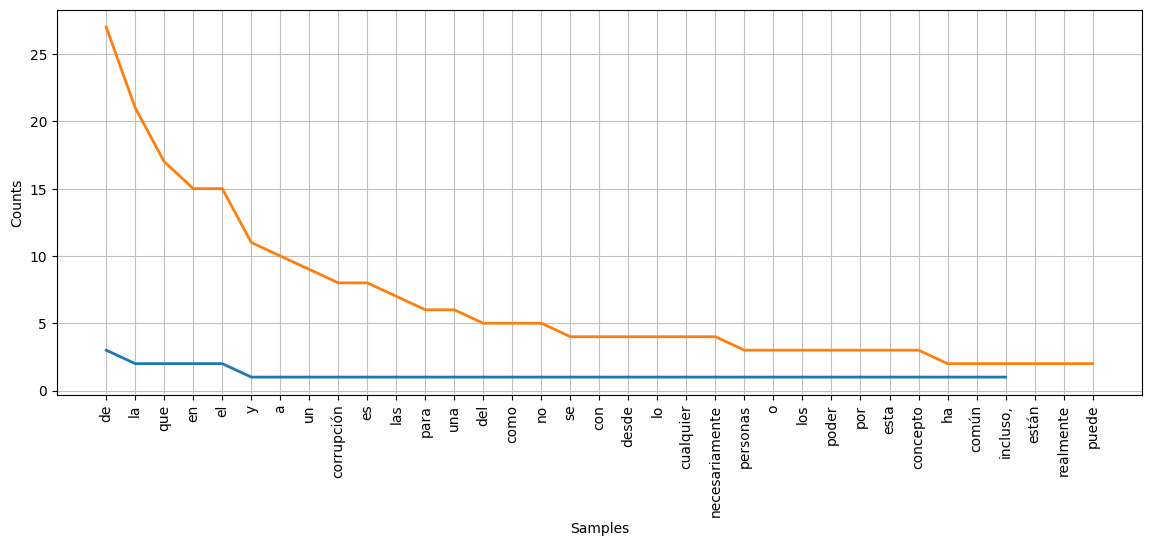

In [ ]:
## - - - - - - - - - - - -
## GRAFICAR FRECUENCIA PALABRAS
## - - - - - - - - - - - -

# Algunas palabras (35)
plt.rcParams["figure.figsize"] = (14,5)
art_bajada_tokens_fq.plot(35)
art_contenido_tokens_fq.plot(35)


<Axes: xlabel='Samples', ylabel='Counts'>

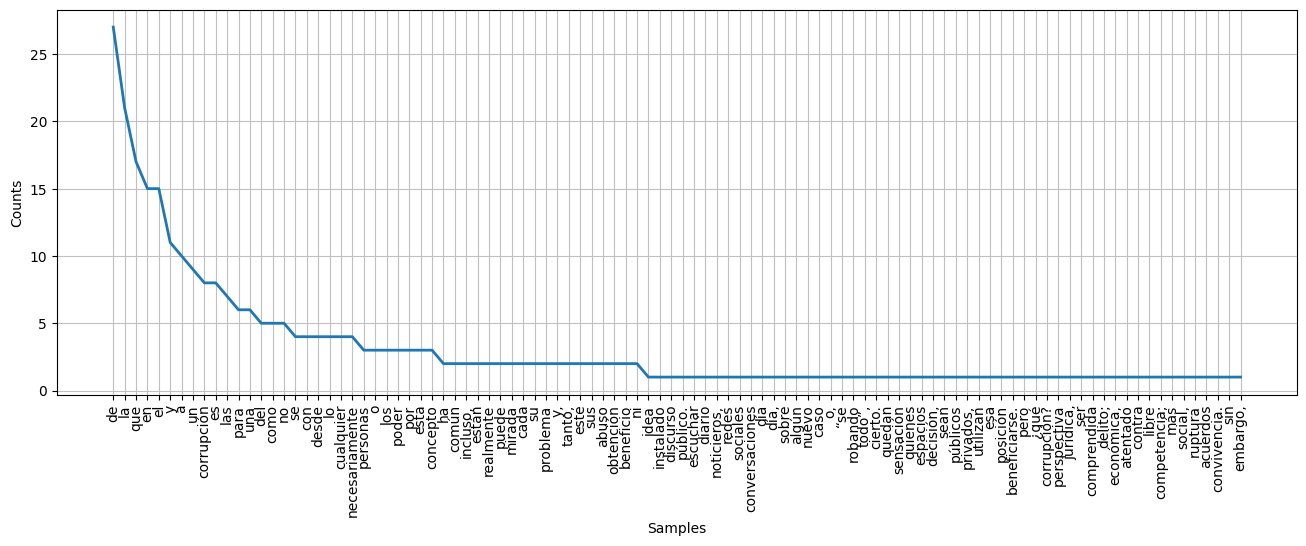

In [ ]:
# Más palabras (100)
plt.rcParams["figure.figsize"] = (16,5)
art_contenido_tokens_fq.plot(100)

## **D- REPORTE INFOGRÁFICO:**  
Pueden diseñar un reporte en formato inforgrafía con los resultados, usando los gráficos desarrollados, imágenes y otros recursos.
Preparar el paterial usando las imágenes exportadas y otra información que resulte del proceso.


## **E- AHORA C WIKIPEDIA**

Este es un ejem plo simple de com obtener algunos recursos de Wikipedia y hacer una nube de palabras.

In [ ]:
## - - - - - - - - - - - -
## DESDE COLAB INSTALAR ESTAS LIBRERIAS
## - - - - - - - - - - - -

#!pip install wikipediaapi
!pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=dc871887ef744a4756c133c0d6613afd95450147839d925ebbb30a5f2fd7d83a
  Stored in directory: /root/.cache/pip/wheels/8f/ab/cb/45ccc40522d3a1c41e1d2ad53b8f33a62f394011ec38cd71c6
Successfully built wikipedia


In [ ]:
## - - - - - - - - - - - -
## IMPORTAR LIBRERIAS
## - - - - - - - - - - - -

# librerias necesarias para trabajar con wikipedia y wordcloud
# para trabajar con datos
import pandas as pd

# libreria visualizacion
import matplotlib.pyplot as plt

# libreria para artículo de wikipedia
import wikipedia

# libreria para generar wordcloud con textos (no solo c wikipedia)
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [ ]:
## - - - - - - - - - - - -
## SELECCIONAR EL ARTICULO DE WIKIPEDIA
## - - - - - - - - - - - -
# Usando libreria de Wikipedia. NO funciona con Wikimedia.

# setear lenguaje en español
wikipedia.set_lang("es")
articulo_wiki = wikipedia.page("La Araucana")

#print( articulo_wiki.url )
#print( articulo_wiki.title)
print( articulo_wiki.summary )
#print( articulo_wiki.content )


La Araucana (1569, 1578 y 1589) es un poema épico del español Alonso de Ercilla que relata la primera fase de la conquista de Chile, particularmente la Guerra de Arauco que enfrentó a españoles y mapuches, pueblo referido bajo el exónimo de «araucanos» en el texto, término de uso frecuente en la época de composición del poema.[1]​


In [ ]:
# Mostrar el texto a usar
print(articulo_wiki.content)


La Araucana (1569, 1578 y 1589) es un poema épico del español Alonso de Ercilla que relata la primera fase de la conquista de Chile, particularmente la Guerra de Arauco que enfrentó a españoles y mapuches, pueblo referido bajo el exónimo de «araucanos» en el texto, término de uso frecuente en la época de composición del poema.[1]​


== Historia: Contexto de la obra y ésta como fuente ==


=== Escritura y publicación ===
Según la versión sostenida por el propio autor en el prólogo de la Primera Parte, que participó en la Guerra de Arauco entre 1557 y 1559, el poema habría sido escrito durante su estancia en la Capitanía General de Chile, usando, a manera de papel, cortezas de árboles y otros elementos rústicos. Ercilla, quien como antiguo paje de la corte de Felipe II contaba con una educación y condición social mayor que la del promedio de los conquistadores, había llegado a la Chile como parte de la expedición de refuerzo comandada por el nuevo gobernador García Hurtado de Mendoza, en

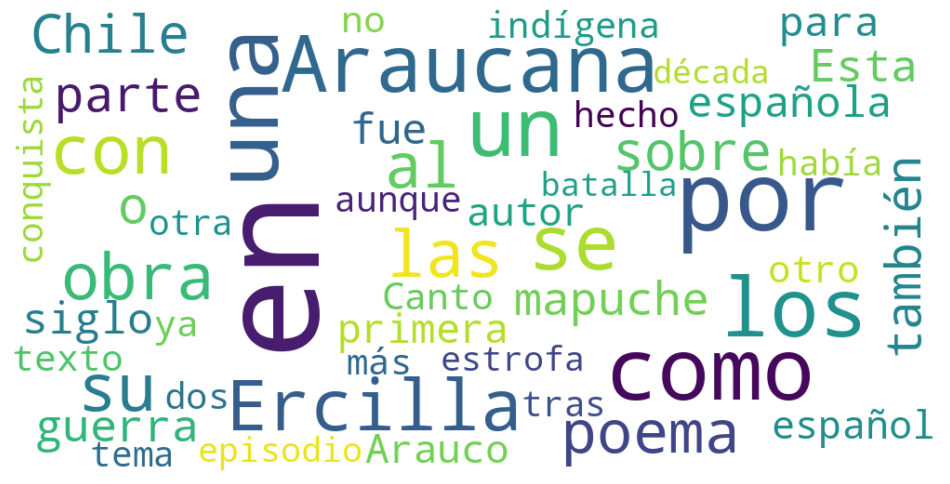

In [69]:
## - - - - - - - - - - - -
## NUB PALABFRAS WIKIPEDIA
## - - - - - - - - - - - -

# Crear y generar una nube de palabras.
# https://www.datacamp.com/tutorial/wordcloud-python?utm_source=google&utm_medium=paid_search&utm_campaignid=21057859163&utm_adgroupid=157296744657&utm_device=c&utm_keyword=&utm_matchtype=&utm_network=g&utm_adpostion=&utm_creative=692112538450&utm_targetid=aud-2274077226600:dsa-2218886984100&utm_loc_interest_ms=&utm_loc_physical_ms=9198028&utm_content=&utm_campaign=230119_1-sea~dsa~tofu_2-b2c_3-es-lang-en_4-prc_5-na_6-na_7-le_8-pdsh-go_9-nb-e_10-na_11-na-fawnov24&gad_source=1&gclid=Cj0KCQiA0MG5BhD1ARIsAEcZtwS5pg-UuwoLtroXBS3Amgjby3Pz5Qa2Hw7SvBbgZ9jzf-x4j4QMwSAaAuN0EALw_wcB

# Puede agregar palabras que no quiere que aparezcan en el grafico
# O puede usar el archovo de stopwords importado mas arriba: las_stopw
mis_stopw = ["a", "de", "del", "es", "entre", "la", "y", "que", "el", "lo"]

# Crear la nube de palabras
# en .generate( otrotextoaca ) # probar otros textos de tipo string, como art_bajada
wordcloud = WordCloud(width=1000, height=500, min_font_size=10, max_font_size=150, max_words=50,
                      background_color="white", stopwords = mis_stopw ).generate( articulo_wiki.content )


# Display imagen:
plt.figure(figsize=(12, 8) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Para guardar imagen
#wordcloud.to_file("articulo_wiki01.png")
#plt.savefig("abc.png")
#files.download("abc.png")


In [66]:
art_contenido

'Transparencia Internacional establece que la corrupción es cualquier abuso de poder que le hemos confiado a alguien para la obtención de un beneficio. Entendiendo, justamente, que ese beneficio no necesariamente es material ni para quien perpetra el acto.'